In [17]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy, Pandas and Matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Include processed data
X_train = np.array(pd.read_csv('/content/drive/MyDrive/P_D/train_x.csv')) 
y_train = np.array(pd.read_csv('/content/drive/MyDrive/P_D/train_y.csv')) 
X_val = np.array(pd.read_csv('/content/drive/MyDrive/P_D/val_x.csv')) 
y_val = np.array(pd.read_csv('/content/drive/MyDrive/P_D/val_y.csv')) 
X_test = np.array(pd.read_csv('/content/drive/MyDrive/P_D/test_x.csv')) 
y_test = np.array(pd.read_csv('/content/drive/MyDrive/P_D/test_y.csv')) 

In [20]:
# Reshaping from 2D 
X_train = X_train.reshape(X_train.shape[0], 40,40,3)
X_test = X_test.reshape(X_test.shape[0], 40,40,3)
X_val = X_val.reshape(X_val.shape[0], 40,40,3)

In [21]:
# Create a model object
model = tf.keras.Sequential()   

In [22]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(80, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(40, 40, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [23]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(80, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(40, 40, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(80, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(40, 40, 3)))  

In [24]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten()) 

In [25]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(80, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(80, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(80, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(10,activation="softmax"))
    
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [26]:
# Train the model for 50 epochs with batch size of 200
results = model.fit(X_train, y_train, batch_size = 200, epochs=50, validation_data=(X_val, y_val))      

Epoch 1/50
35/35 [==============================] - 2s 36ms/step - loss: 2.2233 - accuracy: 0.1403 - val_loss: 2.1355 - val_accuracy: 0.2592
Epoch 2/50
35/35 [==============================] - 1s 22ms/step - loss: 2.1025 - accuracy: 0.2055 - val_loss: 1.8870 - val_accuracy: 0.3062
Epoch 3/50
35/35 [==============================] - 1s 22ms/step - loss: 1.9290 - accuracy: 0.2861 - val_loss: 1.7322 - val_accuracy: 0.4404
Epoch 4/50
35/35 [==============================] - 1s 22ms/step - loss: 1.7589 - accuracy: 0.3601 - val_loss: 1.5449 - val_accuracy: 0.4771
Epoch 5/50
35/35 [==============================] - 1s 22ms/step - loss: 1.6314 - accuracy: 0.4188 - val_loss: 1.3495 - val_accuracy: 0.5333
Epoch 6/50
35/35 [==============================] - 1s 22ms/step - loss: 1.5272 - accuracy: 0.4533 - val_loss: 1.2325 - val_accuracy: 0.5780
Epoch 7/50
35/35 [==============================] - 1s 23ms/step - loss: 1.4208 - accuracy: 0.4822 - val_loss: 1.2076 - val_accuracy: 0.5940
Epoch 8/50
35

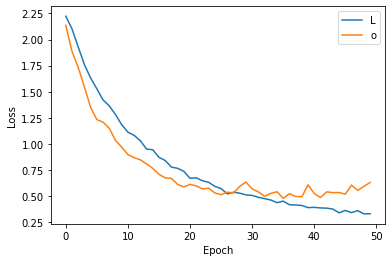

In [27]:
# Plot the the training loss
plt.plot(results.history["loss"], label = "loss")
# Plot the the validation loss
plt.plot(results.history["val_loss"], label = "val_loss")
# Name the x and y axises
plt.ylabel("Loss")
plt.xlabel("Epoch")
# Put legend table
plt.legend("Loss")
# Show the plot
plt.show()


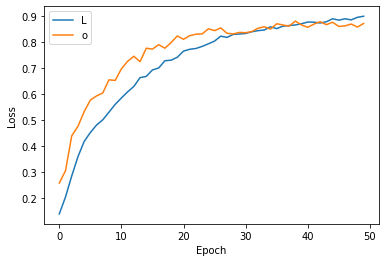

In [28]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label = "accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label = "val_accuracy")

# Name the x and y axises
plt.ylabel("Loss")
plt.xlabel("Epoch")

# Put legend table
plt.legend("Loss")

# Show the plot
plt.show()

In [29]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.8763


[0.6282411813735962, 0.876288652420044]

In [30]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[777].reshape(1,40,40,3))

# Print the prediction result
prediction_result

array([[9.9827446e-07, 2.8275347e-11, 1.4030229e-09, 3.7075133e-05,
        9.6513712e-01, 2.8310697e-07, 6.7486616e-07, 3.4822274e-02,
        1.6318038e-06, 7.0343381e-10]], dtype=float32)

In [31]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [32]:
# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class 4 with 0.9651371240615845 probability %
